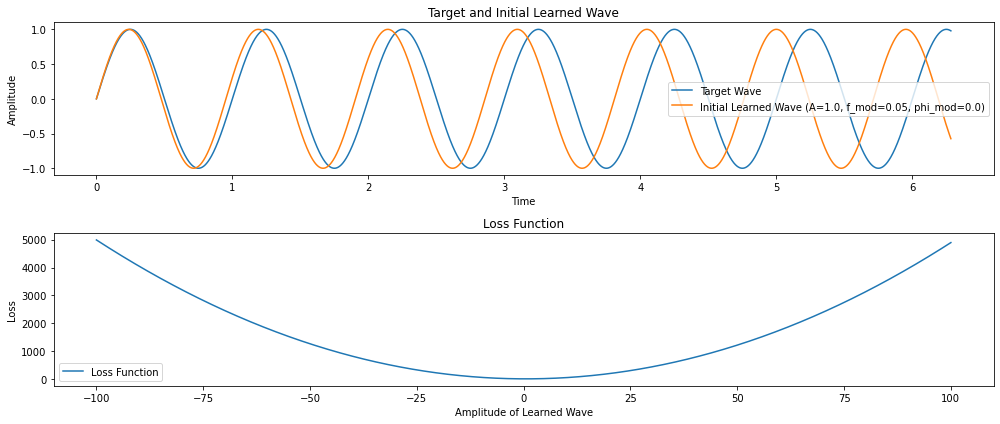

The minimum loss is: 0.38898629457739753
The corresponding amplitude (A) is: 0.5005005005005074


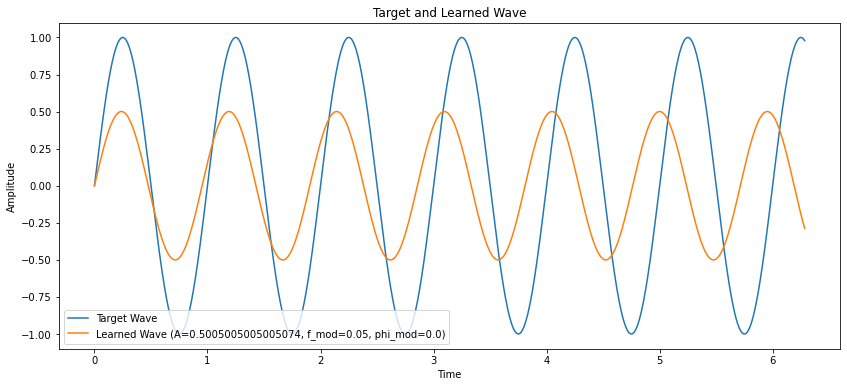

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fixed parameters
f_target = 1  # Frequency
phi = 0  # Phase

# Define the range for the amplitude of the learned wave
A_learned_range = np.linspace(-100.0, 100.0, 1000)

# Define the time variable
t = np.linspace(0, 2*np.pi, 10000)

# Generate the target sine wave
A_target = 1  # Amplitude
target_wave = A_target * np.sin(2 * np.pi * f_target * t + phi)

def sample_arrays(target, learned, x):
    indices = np.random.choice(len(target), size=x, replace=False)
    sampled_target = target[indices]
    sampled_learned = learned[indices]
    return sampled_target, sampled_learned

# Function to generate the learned wave
def generate_learned_wave(A, **kwargs):
    f_mod = kwargs.get('f_mod', 1.0)
    phi_mod = kwargs.get('phi_mod', 0.0)
    return A * np.sin(2 * np.pi * (f_target + f_mod) * t + phi + phi_mod)

def loss_function_m(target, learned):
    return np.mean((target - learned) ** 2)

def loss_function_c(target, learned):
    greater_than = np.sum(learned > target)
    less_than = np.sum(learned < target)
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

def loss_function_a(target, learned):
    diff = learned - target
    greater_than = np.sum(np.abs(diff[diff > 0]))
    less_than = np.sum(np.abs(diff[diff < 0]))
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

def loss_function_L(target, learned):
    target, learned = sample_arrays(target, learned, 10000)
    diff = learned - target
    greater_than = np.sum(np.log(np.abs(diff[diff > 0])))
    less_than = np.sum(np.log(np.abs(diff[diff < 0])))
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

# Specify the offsets for the learned waves
kwargs = {
    'f_mod': 0.05,
    'phi_mod': 0.0
}

# Calculate the loss for each amplitude in the range
losses = []
for A in A_learned_range:
    learned_wave = generate_learned_wave(A, **kwargs)
    loss = loss_function_m(target_wave, learned_wave)
    losses.append(loss)

# Plot the target wave and initial learned wave
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, target_wave, label='Target Wave')
initial_learned_wave = generate_learned_wave(1, **kwargs)  # Initial learned wave with A=1
plt.plot(t, initial_learned_wave, label=f'Initial Learned Wave (A=1.0, f_mod={kwargs["f_mod"]}, phi_mod={kwargs["phi_mod"]})')
plt.title('Target and Initial Learned Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot the loss function
plt.subplot(2, 1, 2)
plt.plot(A_learned_range, losses, label='Loss Function')
plt.title('Loss Function')
plt.xlabel('Amplitude of Learned Wave')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
min_loss = min(losses)
min_loss_index = losses.index(min_loss)
best_amplitude = A_learned_range[min_loss_index]

# Print the results
print(f"The minimum loss is: {min_loss}")
print(f"The corresponding amplitude (A) is: {best_amplitude}")
# Function to plot target and learned wave for a specified amplitude
def plot_learned_wave(A, **kwargs):
    learned_wave = generate_learned_wave(A, **kwargs)
    plt.figure(figsize=(14, 6))
    plt.plot(t, target_wave, label='Target Wave')
    plt.plot(t, learned_wave, label=f'Learned Wave (A={A}, f_mod={kwargs.get("f_mod", 1.0)}, phi_mod={kwargs.get("phi_mod", 0.0)})')
    plt.title('Target and Learned Wave')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Example usage of the new function
plot_learned_wave(best_amplitude, **kwargs)  # Specify the amplitude and kwargs for frequency and phase modifiers
